Contributors:
Chirayu (Mitthi) Jain,
Haaniya Umair
Leonardo Trucios,
Luca Matteucci,
Sneha Jayapradeep




---


# **<a id="Content" style="color:##fadc75;">Table of Contents</a>**

[1. Loading Datasets](#scrollTo=p0dRgXriWfMT)

[2. Data Merge](#scrollTo=YhCN5DLsWadj)

[3. EDA](#scrollTo=L5sp3roLW0ko)

>[Data Cleaning](#scrollTo=P0CuTEyfZoFb)

>[Check for missing values](#scrollTo=oY3nzxpBZQSu)

>[Correlation Matrix](#scrollTo=zqtNCZvAZT0u)

>[Variance Inflation Factor](#scrollTo=t9QZLj92Z1SS)

>[Revenue Distribution](#scrollTo=6umGgwrmaB0u)

>[Representation by Industry Category](#scrollTo=U63CCg6Crdls&line=1&uniqifier=1)

>[Industry wise Revenue subplots](#scrollTo=SzpQR-MkalDB)

>[Industry wise ROA subplots](#scrollTo=87FxIxSYaKJl)

>[Country wise Total Impact Ratio](#scrollTo=F_rmsvupazRb)

>[Industry wise Total Impact Ratio](#scrollTo=E4UQmitRa-eR)

[4. Regressions](#scrollTo=BHZaCYs_TY2Y)

>[Regressions on ROA](#scrollTo=FXF4ZEdshhWP&line=1&uniqifier=1)

>[Regressions on Asset Turnover](#scrollTo=oaS_sRAShsHR)

>[Regressions on Cash Conversions](#scrollTo=rxPVs_-2bOit&line=1&uniqifier=1)

[5. Analysis](#scrollTo=HP4XwxWKlYrf)

[6. Conclusion](#scrollTo=MFsv3-ExhVuk)

Our motivation was to understand how companies' environmental impact relates to their financial performance to promote sustainable business practices and environmental stewardship. Overall our project aims to explore the relationship between environmental impact ratios and financial metrics to provide valuable insights for various stakeholders, including investors, companies, regulators, and researchers, on the financial implications of environmental sustainability efforts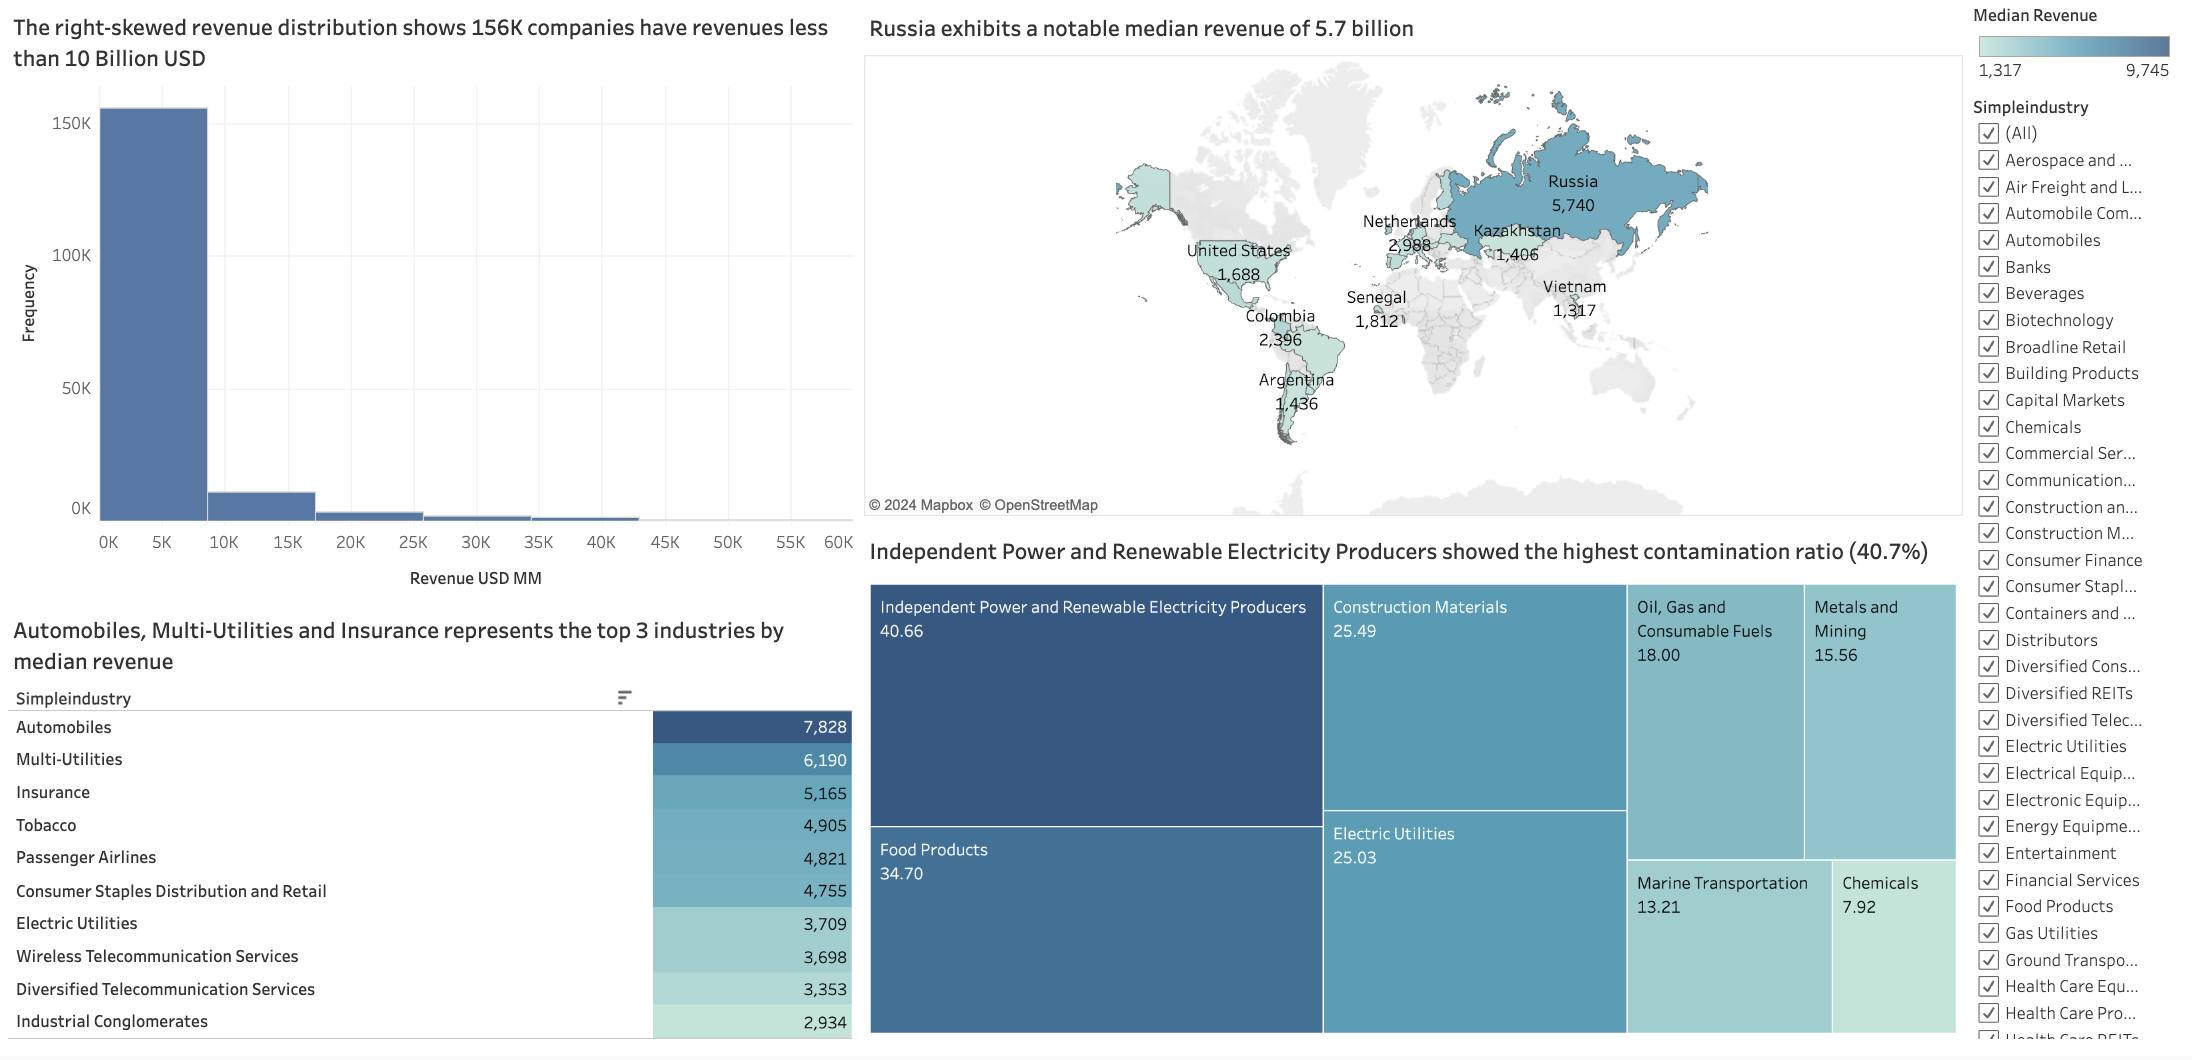

# Loading Datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
!pip install stargazer
from stargazer.stargazer import Stargazer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
environment_df = pd.read_csv('/content/drive/MyDrive/BA875/env_variable_clean.csv')
revenue_df = pd.read_csv('/content/drive/MyDrive/BA875/revenue_var_clean.csv')

<ipython-input-61-e0ce7e0d4f14>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  environment_df = pd.read_csv('/content/drive/MyDrive/BA875/env_variable_clean.csv')
<ipython-input-61-e0ce7e0d4f14>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  revenue_df = pd.read_csv('/content/drive/MyDrive/BA875/revenue_var_clean.csv')


In [ ]:
environment_df

,ticker,gvkey,companyid,di_319442,di_319569,di_319554,di_319385,di_319470,di_319522,di_319450,di_319535
0,NaN,NaN,2.897737e+07,0.106,0.071,0.014,0.049,0.008,2.305000,0.012,0.260
1,NaN,NaN,3.426403e+08,0.106,0.071,0.014,0.049,0.008,15.000000,0.012,0.260
2,NaN,NaN,6.486555e+06,0.112,0.073,0.014,0.051,0.009,6.383000,0.012,0.271
3,NaN,NaN,2.900144e+07,0.106,0.071,0.014,0.049,0.008,5.368000,0.012,0.260
4,NaN,NaN,1.383986e+08,0.106,0.071,0.014,0.049,0.008,4.458000,0.012,0.260
...,...,...,...,...,...,...,...,...,...,...,...
2764039,NaN,NaN,1.848199e+09,2.792,1.883,0.310,3.280,0.278,29.572739,0.507,9.050
2764040,VNE,358076.0,1.848364e+09,0.542,0.260,0.047,0.207,0.034,10.837162,0.053,1.143
2764041,NaN,NaN,1.849162e+09,0.197,0.128,0.030,0.075,0.012,0.975339,0.025,0.467
2764042,NaN,NaN,1.849587e+09,0.310,0.201,0.025,0.106,0.018,1.833873,0.036,0.695


# Data Merge

In [ ]:
environment_df['gvkey'].nunique()

23641

In [ ]:
#Checking to see if the null values in 'ticker' is the same as 'gvkey'. They are not.
#When doing the merge with the financial dataset, we will have to decide between merging on 'ticker' or 'gvkey'.
environment_df['ticker'].isnull().value_counts()

ticker
True     2601007
False     163037
Name: count, dtype: int64

In [ ]:
environment_df['gvkey'].isnull().value_counts()

gvkey
True     2601342
False     162702
Name: count, dtype: int64

In [ ]:
revenue_df

,ticker,gvkey,companyid,simpleindustry,country,fiscalyear,di_319523,di_319540
0,NaN,NaN,2.897737e+07,Insurance,United States,2019,2.305000,100.0
1,NaN,NaN,6.520204e+06,Insurance,United States,2022,4027.500000,100.0
2,NaN,NaN,2.495139e+07,Capital Markets,United States,2022,4027.500000,100.0
3,NaN,NaN,4.396473e+07,Capital Markets,United States,2022,4027.500000,100.0
4,NaN,NaN,3.426403e+08,Insurance,United States,2019,15.000000,100.0
...,...,...,...,...,...,...,...,...
5842464,NaN,NaN,1.862676e+09,Metals and Mining,Italy,2021,58.982348,100.0
5842465,NaN,NaN,1.863445e+09,Food Products,Thailand,2022,40.407472,100.0
5842466,NaN,NaN,1.863593e+09,Real Estate Management and Development,United Kingdom,2021,17.653018,100.0
5842467,NaN,NaN,1.863593e+09,Real Estate Management and Development,United Kingdom,2020,11.834893,100.0


In [ ]:
revenue_df['ticker'].isnull().value_counts()

ticker
True     5450483
False     391986
Name: count, dtype: int64

In [ ]:
revenue_df['gvkey'].isnull().value_counts()

gvkey
True     5452325
False     390144
Name: count, dtype: int64

In [ ]:
#left merging the two datasets (environmental, and revenue info) on 'companyid'
merged_df1 = pd.merge(environment_df, revenue_df, on='companyid', how='left')
merged_df1

,ticker_x,gvkey_x,companyid,di_319442,di_319569,di_319554,di_319385,di_319470,di_319522,di_319450,di_319535,ticker_y,gvkey_y,simpleindustry,country,fiscalyear,di_319523,di_319540
0,NaN,NaN,2.897737e+07,0.106,0.071,0.014,0.049,0.008,2.305000,0.012,0.260,NaN,NaN,Insurance,United States,2019.0,2.305000,100.0
1,NaN,NaN,3.426403e+08,0.106,0.071,0.014,0.049,0.008,15.000000,0.012,0.260,NaN,NaN,Insurance,United States,2019.0,15.000000,100.0
2,NaN,NaN,6.486555e+06,0.112,0.073,0.014,0.051,0.009,6.383000,0.012,0.271,NaN,NaN,Insurance,United States,2018.0,6.383000,100.0
3,NaN,NaN,2.900144e+07,0.106,0.071,0.014,0.049,0.008,5.368000,0.012,0.260,NaN,NaN,Insurance,United States,2019.0,5.368000,100.0
4,NaN,NaN,1.383986e+08,0.106,0.071,0.014,0.049,0.008,4.458000,0.012,0.260,NaN,NaN,Insurance,United States,2019.0,4.458000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402619,NaN,NaN,1.849162e+09,0.197,0.128,0.030,0.075,0.012,0.975339,0.025,0.467,NaN,NaN,Professional Services,France,2019.0,0.975339,100.0
15402620,NaN,NaN,1.849587e+09,0.310,0.201,0.025,0.106,0.018,1.833873,0.036,0.695,NaN,NaN,Health Care Providers and Services,Romania,2022.0,1.627830,100.0
15402621,NaN,NaN,1.849587e+09,0.310,0.201,0.025,0.106,0.018,1.833873,0.036,0.695,NaN,NaN,Health Care Providers and Services,Romania,2021.0,1.834647,100.0
15402622,NaN,NaN,1.849629e+09,0.260,0.135,0.033,0.106,0.021,29.002494,0.025,0.581,NaN,NaN,"Hotels, Restaurants and Leisure",United Kingdom,2022.0,33.510261,100.0


In [ ]:
#since there are duplicate columns we will drop the ones that are extra
merged_df1.drop(['ticker_y', 'gvkey_y'], axis=1, inplace=True)
merged_df1

,ticker_x,gvkey_x,companyid,di_319442,di_319569,di_319554,di_319385,di_319470,di_319522,di_319450,di_319535,simpleindustry,country,fiscalyear,di_319523,di_319540
0,NaN,NaN,2.897737e+07,0.106,0.071,0.014,0.049,0.008,2.305000,0.012,0.260,Insurance,United States,2019.0,2.305000,100.0
1,NaN,NaN,3.426403e+08,0.106,0.071,0.014,0.049,0.008,15.000000,0.012,0.260,Insurance,United States,2019.0,15.000000,100.0
2,NaN,NaN,6.486555e+06,0.112,0.073,0.014,0.051,0.009,6.383000,0.012,0.271,Insurance,United States,2018.0,6.383000,100.0
3,NaN,NaN,2.900144e+07,0.106,0.071,0.014,0.049,0.008,5.368000,0.012,0.260,Insurance,United States,2019.0,5.368000,100.0
4,NaN,NaN,1.383986e+08,0.106,0.071,0.014,0.049,0.008,4.458000,0.012,0.260,Insurance,United States,2019.0,4.458000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402619,NaN,NaN,1.849162e+09,0.197,0.128,0.030,0.075,0.012,0.975339,0.025,0.467,Professional Services,France,2019.0,0.975339,100.0
15402620,NaN,NaN,1.849587e+09,0.310,0.201,0.025,0.106,0.018,1.833873,0.036,0.695,Health Care Providers and Services,Romania,2022.0,1.627830,100.0
15402621,NaN,NaN,1.849587e+09,0.310,0.201,0.025,0.106,0.018,1.833873,0.036,0.695,Health Care Providers and Services,Romania,2021.0,1.834647,100.0
15402622,NaN,NaN,1.849629e+09,0.260,0.135,0.033,0.106,0.021,29.002494,0.025,0.581,"Hotels, Restaurants and Leisure",United Kingdom,2022.0,33.510261,100.0


In [ ]:
#picking the environmental factors that are relevant to our business problem - only the 'total imapct ratios'
env_col = ['di_319442', 'di_319569', 'di_319554', 'di_319385', 'di_319470', 'di_319522', 'di_319450', 'di_319535', 'di_319523', 'di_319540']

#grouping by company (TICKER) and year, then calculate annual averages
merged_df1_final = merged_df1.groupby([merged_df1['companyid'], merged_df1['ticker_x'], merged_df1['gvkey_x'], merged_df1['simpleindustry'], merged_df1['country'], merged_df1['fiscalyear']])[env_col].mean()
merged_df1_final.reset_index(inplace=True)

merged_df1_final

,companyid,ticker_x,gvkey_x,simpleindustry,country,fiscalyear,di_319442,di_319569,di_319554,di_319385,di_319470,di_319522,di_319450,di_319535,di_319523,di_319540
0,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2002.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,493.050000,100.000000
1,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2003.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,382.300000,100.000000
2,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2004.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,389.620000,100.000000
3,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2005.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,547.980000,100.000000
4,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2006.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,1675.580000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177523,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2020.0,0.736000,0.451000,0.07600,0.327000,0.133000,88.262947,0.061000,1.784000,29.420982,33.333333
177524,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2022.0,0.736000,0.451000,0.07600,0.327000,0.133000,88.262947,0.061000,1.784000,290.961816,25.000000
177525,1.780842e+09,YYLGD,353171.0,Food Products,Turkey,2019.0,6.410000,60.806000,0.10200,5.654000,0.224000,154.563158,22.947000,96.144000,154.563158,100.000000
177526,1.786049e+09,POZ,353841.0,Household Durables,Italy,2021.0,0.340000,0.127000,0.05100,0.113000,0.020000,20.293446,0.024000,0.675000,20.293446,100.000000


In [ ]:
merged_df1_final.nunique()

companyid          22679
ticker_x           20251
gvkey_x            22785
simpleindustry        74
country              111
fiscalyear            21
di_319442          19969
di_319569          19285
di_319554          18434
di_319385          19354
di_319470          17675
di_319522          24990
di_319450          18235
di_319535          20612
di_319523         174565
di_319540            312
dtype: int64

In [ ]:
#uploading the 'dataset 0' that has company financials
df3 = pd.read_csv('/content/drive/MyDrive/BA875/WRDS_IBES_Company_Financials_subset.csv')
df3

,gvkey,permno,adate,qdate,public_date,roa,invt_act,cash_conversion,inv_turn,at_turn,rd_sale,staff_sale,TICKER,cusip
0,1004,54594,5/31/09,11/30/09,1/31/10,0.095,0.572,186.451,2.272,1.001,0.0,0.0,AIR,00036110
1,1004,54594,5/31/09,11/30/09,2/28/10,0.095,0.572,186.451,2.272,1.001,0.0,0.0,AIR,00036110
2,1004,54594,5/31/09,11/30/09,3/31/10,0.095,0.572,186.451,2.272,1.001,0.0,0.0,AIR,00036110
3,1004,54594,5/31/09,2/28/10,4/30/10,0.086,0.563,183.882,2.312,0.987,0.0,0.0,AIR,00036110
4,1004,54594,5/31/09,2/28/10,5/31/10,0.086,0.563,183.882,2.312,0.987,0.0,0.0,AIR,00036110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572936,349972,15642,12/31/21,6/30/22,8/31/22,-0.342,0.000,NaN,NaN,NaN,0.0,NaN,INDP,45339J10
572937,349972,15642,12/31/21,6/30/22,9/30/22,-0.342,0.000,NaN,NaN,NaN,0.0,NaN,INDP,45339J10
572938,349972,15642,12/31/21,6/30/22,10/31/22,-0.342,0.000,NaN,NaN,NaN,0.0,NaN,INDP,45339J10
572939,349972,15642,12/31/21,9/30/22,11/30/22,-0.361,0.000,NaN,NaN,NaN,0.0,NaN,INDP,45339J10


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572941 entries, 0 to 572940
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gvkey            572941 non-null  int64  
 1   permno           572941 non-null  int64  
 2   adate            569956 non-null  object 
 3   qdate            572941 non-null  object 
 4   public_date      572941 non-null  object 
 5   roa              567412 non-null  float64
 6   invt_act         462062 non-null  float64
 7   cash_conversion  399978 non-null  float64
 8   inv_turn         406392 non-null  float64
 9   at_turn          545433 non-null  float64
 10  rd_sale          570490 non-null  float64
 11  staff_sale       544503 non-null  float64
 12  TICKER           569614 non-null  object 
 13  cusip            570055 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 61.2+ MB


In [ ]:
#since this dataset has info for every month of years, we are aggregating this information by taking the annual averages
#this will make our dataset merge smoother
date_columns = ['adate', 'qdate', 'public_date']
for col in date_columns:
    df3[col] = pd.to_datetime(df3[col])


numeric_columns = ['roa', 'invt_act', 'cash_conversion', 'inv_turn', 'at_turn', 'rd_sale', 'staff_sale']
df3[numeric_columns] = df3[numeric_columns].astype(float)
annual_averages = df3.groupby([df3['TICKER'], df3['gvkey'], df3['adate'].dt.year])[numeric_columns].mean()
annual_averages.reset_index(inplace=True)

annual_averages

<ipython-input-75-68d0356dfcd8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3[col] = pd.to_datetime(df3[col])
<ipython-input-75-68d0356dfcd8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3[col] = pd.to_datetime(df3[col])
<ipython-input-75-68d0356dfcd8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3[col] = pd.to_datetime(df3[col])


,TICKER,gvkey,adate,roa,invt_act,cash_conversion,inv_turn,at_turn,rd_sale,staff_sale
0,A,126554,2009.0,0.092091,0.130000,96.734182,3.469909,0.628455,0.131000,0.0
1,A,126554,2010.0,0.138750,0.134000,90.452500,3.438500,0.683000,0.105750,0.0
2,A,126554,2011.0,0.165750,0.167000,101.649750,3.217250,0.736000,0.096750,0.0
3,A,126554,2012.0,0.150500,0.217750,117.617250,2.860250,0.674750,0.100750,0.0
4,A,126554,2013.0,0.118500,0.215500,157.209000,2.224000,0.541000,0.098250,0.0
...,...,...,...,...,...,...,...,...,...,...
54049,ZYXI,129441,2021.0,0.258455,0.150091,158.215636,2.309727,1.232182,0.018636,0.0
54050,ZZ,8101,2009.0,0.136250,0.157000,32.617000,11.225750,1.220750,0.000000,0.0
54051,ZZ,8101,2010.0,0.124250,0.170000,36.814250,11.847250,1.292750,0.000000,0.0
54052,ZZ,8101,2011.0,0.101000,0.171000,35.996750,12.148500,1.327750,0.000000,0.0


In [ ]:
annual_averages['gvkey'].nunique()

7153

In [ ]:
annual_averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54054 entries, 0 to 54053
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TICKER           54054 non-null  object 
 1   gvkey            54054 non-null  int64  
 2   adate            54054 non-null  float64
 3   roa              53908 non-null  float64
 4   invt_act         43861 non-null  float64
 5   cash_conversion  38685 non-null  float64
 6   inv_turn         38521 non-null  float64
 7   at_turn          51790 non-null  float64
 8   rd_sale          54054 non-null  float64
 9   staff_sale       51479 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.1+ MB


In [ ]:
#doing the final merge with our environment/revenue data and the financial information
#we are doing this merge on 'gvkey' and 'fiscalyear'
merged_final = pd.merge(merged_df1_final, annual_averages, left_on=['gvkey_x','fiscalyear'], right_on=['gvkey','adate'], how='left')
merged_final

,companyid,ticker_x,gvkey_x,simpleindustry,country,fiscalyear,di_319442,di_319569,di_319554,di_319385,...,TICKER,gvkey,adate,roa,invt_act,cash_conversion,inv_turn,at_turn,rd_sale,staff_sale
0,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2002.0,0.126976,0.085617,0.01577,0.059711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2003.0,0.126976,0.085617,0.01577,0.059711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2004.0,0.126976,0.085617,0.01577,0.059711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2005.0,0.126976,0.085617,0.01577,0.059711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2006.0,0.126976,0.085617,0.01577,0.059711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177736,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2020.0,0.736000,0.451000,0.07600,0.327000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177737,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2022.0,0.736000,0.451000,0.07600,0.327000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177738,1.780842e+09,YYLGD,353171.0,Food Products,Turkey,2019.0,6.410000,60.806000,0.10200,5.654000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177739,1.786049e+09,POZ,353841.0,Household Durables,Italy,2021.0,0.340000,0.127000,0.05100,0.113000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177741 entries, 0 to 177740
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   companyid        177741 non-null  float64
 1   ticker_x         177741 non-null  object 
 2   gvkey_x          177741 non-null  float64
 3   simpleindustry   177741 non-null  object 
 4   country          177741 non-null  object 
 5   fiscalyear       177741 non-null  float64
 6   di_319442        177741 non-null  float64
 7   di_319569        177741 non-null  float64
 8   di_319554        177741 non-null  float64
 9   di_319385        177741 non-null  float64
 10  di_319470        177741 non-null  float64
 11  di_319522        177741 non-null  float64
 12  di_319450        177741 non-null  float64
 13  di_319535        177741 non-null  float64
 14  di_319523        177609 non-null  float64
 15  di_319540        177609 non-null  float64
 16  TICKER           24185 non-null   obje

In [ ]:
#dropping the financial ratios we did not choose, as well as duplicate columns
merged_final.drop(['invt_act', 'inv_turn', 'rd_sale', 'staff_sale', 'TICKER', 'gvkey', 'adate'], axis=1, inplace=True)

In [ ]:
merged_final.sort_values(by=['ticker_x'])

,companyid,ticker_x,gvkey_x,simpleindustry,country,fiscalyear,di_319442,di_319569,di_319554,di_319385,di_319470,di_319522,di_319450,di_319535,di_319523,di_319540,roa,cash_conversion,at_turn
86520,3277902.0,000001,213380.0,Banks,China,2011.0,0.094715,0.071686,0.010303,0.040367,0.008552,11619.017813,0.012572,0.238271,4676.785595,100.0,NaN,NaN,NaN
86518,3277902.0,000001,213380.0,Banks,China,2009.0,0.094715,0.071686,0.010303,0.040367,0.008552,11619.017813,0.012572,0.238271,2259.654992,100.0,NaN,NaN,NaN
86519,3277902.0,000001,213380.0,Banks,China,2010.0,0.094715,0.071686,0.010303,0.040367,0.008552,11619.017813,0.012572,0.238271,2720.206874,100.0,NaN,NaN,NaN
86531,3277902.0,000001,213380.0,Banks,China,2022.0,0.094715,0.071686,0.010303,0.040367,0.008552,11619.017813,0.012572,0.238271,8078.685610,50.0,NaN,NaN,NaN
86521,3277902.0,000001,213380.0,Banks,China,2012.0,0.094715,0.071686,0.010303,0.040367,0.008552,11619.017813,0.012572,0.238271,6146.230291,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170919,303335965.0,ZZZ,25304.0,Specialty Retail,Canada,2019.0,0.527172,0.305752,0.070386,0.185903,0.036705,527.377524,0.035075,1.160994,536.709164,100.0,NaN,NaN,NaN
170918,303335965.0,ZZZ,25304.0,Specialty Retail,Canada,2018.0,0.527172,0.305752,0.070386,0.185903,0.036705,527.377524,0.035075,1.160994,480.742320,100.0,NaN,NaN,NaN
170917,303335965.0,ZZZ,25304.0,Specialty Retail,Canada,2017.0,0.527172,0.305752,0.070386,0.185903,0.036705,527.377524,0.035075,1.160994,452.879324,100.0,NaN,NaN,NaN
170916,303335965.0,ZZZ,25304.0,Specialty Retail,Canada,2016.0,0.527172,0.305752,0.070386,0.185903,0.036705,527.377524,0.035075,1.160994,395.114135,100.0,NaN,NaN,NaN


In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177741 entries, 0 to 177740
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   companyid        177741 non-null  float64
 1   ticker_x         177741 non-null  object 
 2   gvkey_x          177741 non-null  float64
 3   simpleindustry   177741 non-null  object 
 4   country          177741 non-null  object 
 5   fiscalyear       177741 non-null  float64
 6   di_319442        177741 non-null  float64
 7   di_319569        177741 non-null  float64
 8   di_319554        177741 non-null  float64
 9   di_319385        177741 non-null  float64
 10  di_319470        177741 non-null  float64
 11  di_319522        177741 non-null  float64
 12  di_319450        177741 non-null  float64
 13  di_319535        177741 non-null  float64
 14  di_319523        177609 non-null  float64
 15  di_319540        177609 non-null  float64
 16  roa              24178 non-null   floa

In [ ]:
#renaming the columns to reduce the friction in understanding our dataset
#all environmental ratios had a code, which we have now renamed to what they actually are
merged_final.rename(columns={'ticker_x': 'ticker', 'gvkey_x': 'gvkey', 'di_319442': 'ghg_total_impact_ratio', 'di_319569': 'water_impact_ratio', 'di_319554': 'waste_impact_ratio', 'di_319385': 'airpollutants_impact_ratio', 'di_319470': 'naturalresource_impact_ratio', 'di_319522': 'revenue', 'di_319450': 'lwp_impact_ratio', 'di_319535': 'total_impact_ratio','di_319523': 'company_sector_revenue', 'di_319540': 'sector_revenue/total_revenue'}, inplace=True)
merged_final

,companyid,ticker,gvkey,simpleindustry,country,fiscalyear,ghg_total_impact_ratio,water_impact_ratio,waste_impact_ratio,airpollutants_impact_ratio,naturalresource_impact_ratio,revenue,lwp_impact_ratio,total_impact_ratio,company_sector_revenue,sector_revenue/total_revenue,roa,cash_conversion,at_turn
0,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2002.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,493.050000,100.000000,NaN,NaN,NaN
1,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2003.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,382.300000,100.000000,NaN,NaN,NaN
2,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2004.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,389.620000,100.000000,NaN,NaN,NaN
3,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2005.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,547.980000,100.000000,NaN,NaN,NaN
4,1.851100e+04,III,210835.0,Capital Markets,United Kingdom,2006.0,0.126976,0.085617,0.01577,0.059711,0.016389,1405.564204,0.012452,0.316916,1675.580000,100.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177736,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2020.0,0.736000,0.451000,0.07600,0.327000,0.133000,88.262947,0.061000,1.784000,29.420982,33.333333,NaN,NaN,NaN
177737,1.685076e+09,IGRD,325229.0,Construction and Engineering,Qatar,2022.0,0.736000,0.451000,0.07600,0.327000,0.133000,88.262947,0.061000,1.784000,290.961816,25.000000,NaN,NaN,NaN
177738,1.780842e+09,YYLGD,353171.0,Food Products,Turkey,2019.0,6.410000,60.806000,0.10200,5.654000,0.224000,154.563158,22.947000,96.144000,154.563158,100.000000,NaN,NaN,NaN
177739,1.786049e+09,POZ,353841.0,Household Durables,Italy,2021.0,0.340000,0.127000,0.05100,0.113000,0.020000,20.293446,0.024000,0.675000,20.293446,100.000000,NaN,NaN,NaN


In [ ]:
merged_final['gvkey'].nunique()

22785

In [ ]:
merged_final.to_csv('Final_Dataset_2', index=False)

In [ ]:
#since there are many null values in the financial ratio columns, we are dropping them since we want to run a valid regression
reg_roa = merged_final[merged_final['roa'].notnull()]
reg_cash_conversion = merged_final[merged_final['cash_conversion'].notnull()]
reg_at_turn = merged_final[merged_final['at_turn'].notnull()]
reg_all_out = merged_final[merged_final['roa'].notnull() & merged_final['cash_conversion'].notnull() & merged_final['at_turn'].notnull()]

# EDA

In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177741 entries, 0 to 177740
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   companyid                     177741 non-null  float64
 1   ticker                        177741 non-null  object 
 2   gvkey                         177741 non-null  float64
 3   simpleindustry                177741 non-null  object 
 4   country                       177741 non-null  object 
 5   fiscalyear                    177741 non-null  float64
 6   ghg_total_impact_ratio        177741 non-null  float64
 7   water_impact_ratio            177741 non-null  float64
 8   waste_impact_ratio            177741 non-null  float64
 9   airpollutants_impact_ratio    177741 non-null  float64
 10  naturalresource_impact_ratio  177741 non-null  float64
 11  revenue                       177741 non-null  float64
 12  lwp_impact_ratio              177741 non-nul

## Data Cleaning

In [ ]:
#changing some variables to the correct datatype
merged_final['simpleindustry'] = merged_final['simpleindustry'].astype('category')
merged_final['country'] = merged_final['country'].astype('category')

In [ ]:
merged_final.describe()

,companyid,gvkey,fiscalyear,ghg_total_impact_ratio,water_impact_ratio,waste_impact_ratio,airpollutants_impact_ratio,naturalresource_impact_ratio,revenue,lwp_impact_ratio,total_impact_ratio,company_sector_revenue,sector_revenue/total_revenue,roa,cash_conversion,at_turn
count,1.777410e+05,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177741.000000,177609.000000,177609.000000,24178.000000,1.874600e+04,24170.000000
mean,4.337817e+07,183856.874289,2015.974052,2.059145,1.785266,0.182889,0.886313,0.623265,4819.675985,0.384434,5.921335,2515.664304,67.859708,0.067858,2.680836e+04,0.769301
std,1.081098e+08,106273.924959,5.274764,5.758171,8.849657,4.439528,5.439905,10.362540,15372.060696,2.005621,18.900813,8412.253192,32.435698,0.207966,1.386454e+06,0.712315
min,1.851100e+04,1004.000000,2002.000000,0.085663,0.058000,0.009432,0.036813,0.005102,0.000109,0.008805,0.218056,0.000001,1.369863,-8.021000,8.000000e-03,0.000000
25%,8.742220e+05,100781.000000,2013.000000,0.333354,0.188643,0.038123,0.130825,0.024427,275.496988,0.030761,0.798570,155.753469,33.333333,0.025636,3.463456e+01,0.286312
50%,4.458154e+06,209265.000000,2017.000000,0.724736,0.420191,0.063289,0.282000,0.046603,961.591036,0.074053,1.889647,522.678729,50.000000,0.095250,6.847537e+01,0.614550
75%,2.346610e+07,272961.000000,2020.000000,1.648541,0.976548,0.098698,0.652643,0.104430,3326.837937,0.158160,4.071315,1764.615158,100.000000,0.153250,1.223157e+02,1.040188
max,1.815804e+09,360500.000000,2022.000000,184.680929,559.855614,883.639205,582.713992,904.782351,653260.497890,68.264689,919.502868,653260.497890,100.000005,1.674545,1.588000e+08,12.245000


In [ ]:
merged_final['country'].nunique()

111

In [ ]:
print(merged_final.isnull().sum())

companyid                            0
ticker                               0
gvkey                                0
simpleindustry                       0
country                              0
fiscalyear                           0
ghg_total_impact_ratio               0
water_impact_ratio                   0
waste_impact_ratio                   0
airpollutants_impact_ratio           0
naturalresource_impact_ratio         0
revenue                              0
lwp_impact_ratio                     0
total_impact_ratio                   0
company_sector_revenue             132
sector_revenue/total_revenue       132
roa                             153563
cash_conversion                 158995
at_turn                         153571
dtype: int64


## Checking for missing values

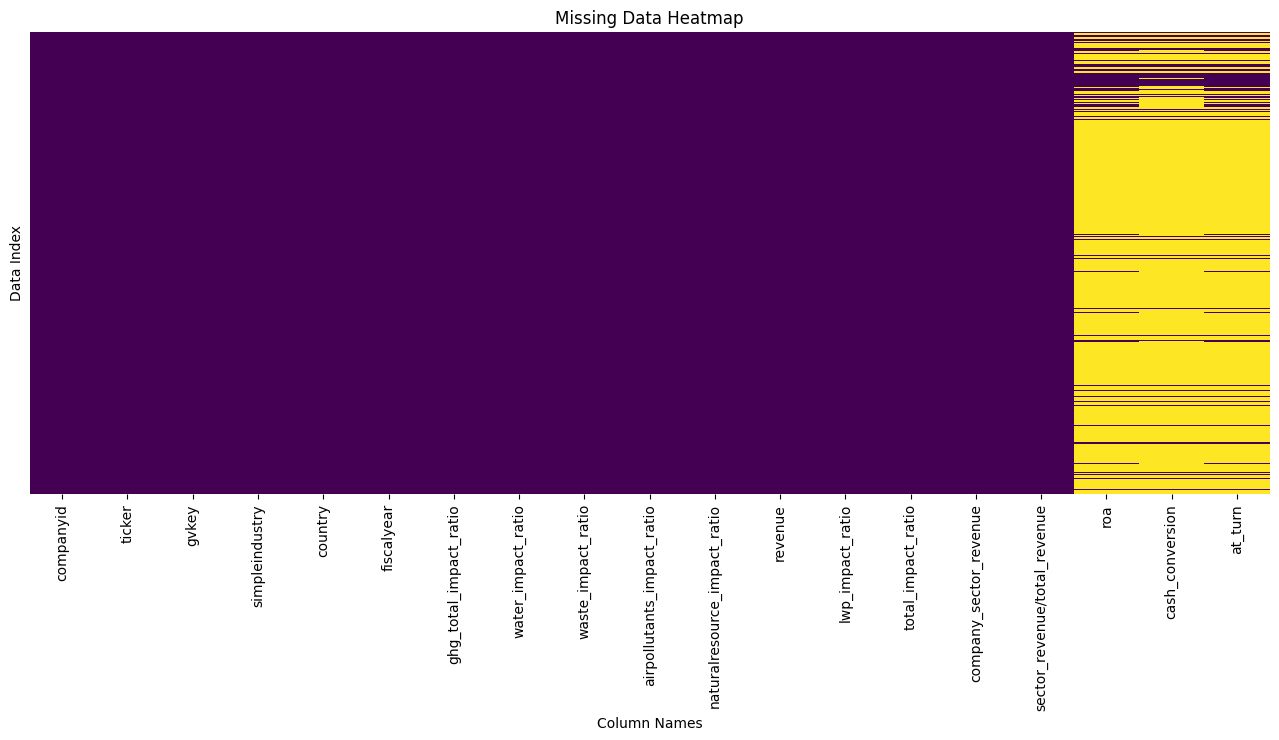

In [ ]:
## check for missing values
missing = merged_final.isnull()
plt.figure(figsize=(16, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xlabel('Column Names')
plt.ylabel('Data Index')
plt.show()

## Correlation Matrix

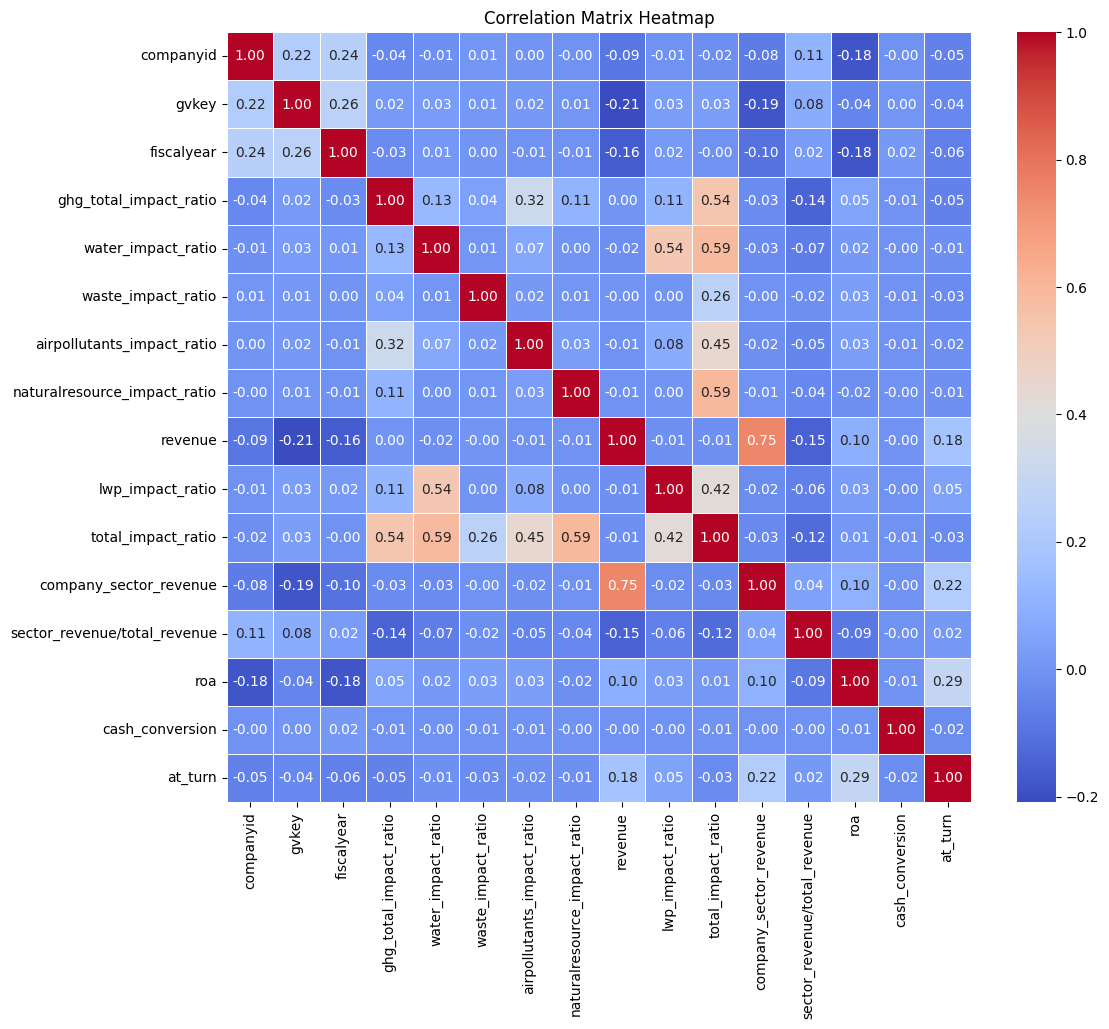

In [ ]:
## Correlation Matrix
numerical_columns = merged_final.select_dtypes(include=['float64'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation analysis reveals important relationships within your dataset, particularly highlighting the strong correlation between 'revenue' and 'company sector revenue', which aligns with expectations that larger companies within sectors tend to contribute significantly to overall sector revenue. Additionally, the high correlation observed between the total impact ratio and its individual components underscores the comprehensive nature of environmental impact assessment, where the overall impact is influenced by specific environmental factors like greenhouse gas emissions, water usage, and waste generation.

## Variance Inflation Factor (VIF)

In [ ]:
##VARIANCE INFLATION FACTOR - identifying multicollinearity among predictor variables
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the predictor variables for VIF calculation
selected_columns = [
    'ghg_total_impact_ratio', 'water_impact_ratio', 'waste_impact_ratio',
    'airpollutants_impact_ratio', 'naturalresource_impact_ratio', 'revenue',
    'lwp_impact_ratio', 'total_impact_ratio', 'company_sector_revenue',
    'sector_revenue/total_revenue', 'roa', 'cash_conversion', 'at_turn'
]

X = merged_final[selected_columns]

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


<ipython-input-94-d59556280114>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-94-d59556280114>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


,Variable,VIF
8,total_impact_ratio,6.864621e+09
5,naturalresource_impact_ratio,3.926211e+09
2,water_impact_ratio,1.106157e+09
1,ghg_total_impact_ratio,3.827015e+08
4,airpollutants_impact_ratio,1.486379e+08
7,lwp_impact_ratio,2.950687e+07
3,waste_impact_ratio,3.474051e+06
0,const,1.053934e+01
9,company_sector_revenue,3.006720e+00
6,revenue,3.005894e+00


High VIF Values (total_impact_ratio, naturalresource_impact_ratio, water_impact_ratio,ghg_total_impact_ratio, airpollutants_impact_ratio, lwp_impact_ratio, waste_impact_ratio):
These variables exhibit very high VIF values, indicating strong multicollinearity with other predictors.
Regression coefficients for these variables may be unstable or unreliable due to multicollinearity.


Low VIF Values (roa, cash_conversion, at_turn, sector_revenue/total_revenue, revenue, company_sector_revenue):
These variables have relatively low VIF values (close to 1), suggesting lower levels of multicollinearity.
Regression coefficients for these variables are likely more stable and reliable compared to variables with higher VIF values.

Given these results, we will proceed with our regression analysis by considering each environmental factor individually rather than combining them all together.

## Representation by Industry Category

In [ ]:
#Percentage of companies by Industry
industry_counts = merged_final['simpleindustry'].value_counts()

industry_percentages = (industry_counts / len(merged_final)) * 100

industry_summary = pd.DataFrame({
    'Industry': industry_percentages.index,
    'Number of Companies': industry_counts.values,
    'Percentage of Companies (%)': industry_percentages.values
})

industry_summary = industry_summary.sort_values(by='Percentage of Companies (%)', ascending=False)
print("Percentage of Companies by Industry:")
industry_summary.head(10)


Percentage of Companies by Industry:


,Industry,Number of Companies,Percentage of Companies (%)
0,Banks,9912,5.576654
1,Metals and Mining,6894,3.878677
2,Real Estate Management and Development,6783,3.816227
3,Machinery,6779,3.813977
4,Chemicals,6696,3.767279
5,"Oil, Gas and Consumable Fuels",6197,3.486534
6,"Electronic Equipment, Instruments and Components",5606,3.154027
7,Food Products,5564,3.130398
8,Capital Markets,5042,2.836712
9,Semiconductors and Semiconductor Equipment,4607,2.591974


The dataset consists of companies spanning diverse industries. The most prevalent industry is 'Banks', accounting for 5.58% of the dataset with 9,912 companies. Other prominent sectors include 'Metals and Mining' (3.88%), 'Real Estate Management and Development' (3.82%), and 'Machinery' (3.81%). Industries like 'Chemicals', 'Oil, Gas and Consumable Fuels', 'Electronic Equipment', 'Food Products', 'Capital Markets', and 'Semiconductors' also feature prominently, reflecting a broad representation of finance, manufacturing, energy, technology, and consumer goods sectors within the dataset. This distribution highlights the dataset's comprehensive coverage of various industries and economic activities.

## Revenue Distribution

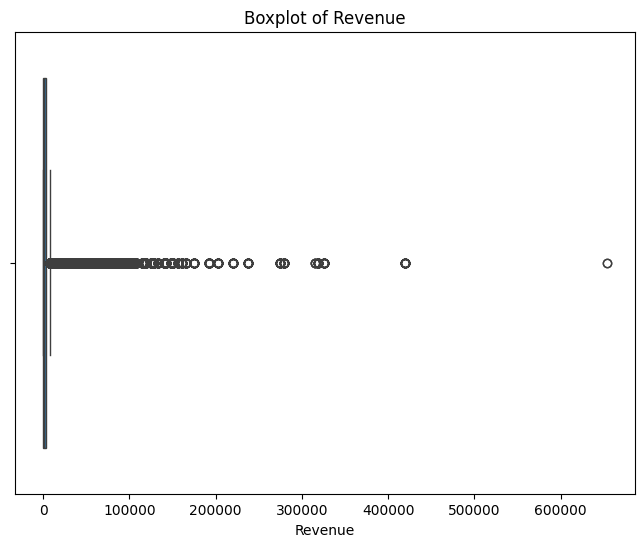

In [ ]:
## Revenue Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=merged_final['revenue'])
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')
plt.show()

The revenue distribution among 177,741 companies in the dataset is characterized by significant variability. The average revenue is approximately \$4,819.68, with a substantial standard deviation of \$15,372.06, indicating wide-ranging revenue levels across companies. While some companies report minimal revenue values (including a minimum of \$0.000109), others generate substantial revenue, with the maximum recorded revenue reaching \$653,260.50. The median revenue of \$961.59 highlights that half of the companies have revenue below this value. This diverse distribution underscores the varied financial profiles within the dataset, necessitating careful analysis for market insights, strategic decision-making, and resource allocation. Understanding this revenue distribution is essential for identifying business opportunities and assessing financial performance effectively.

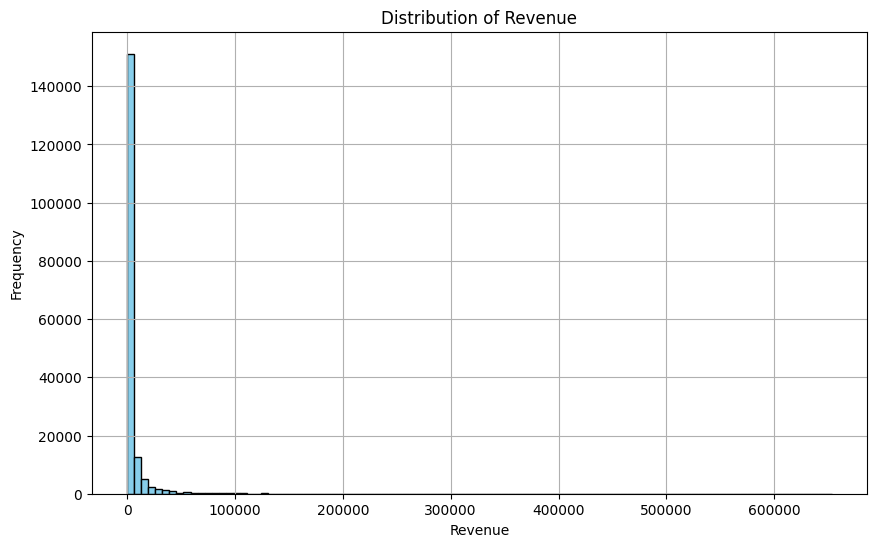

In [ ]:
# Plotting a histogram of revenue
plt.figure(figsize=(10, 6))
plt.hist(merged_final['revenue'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

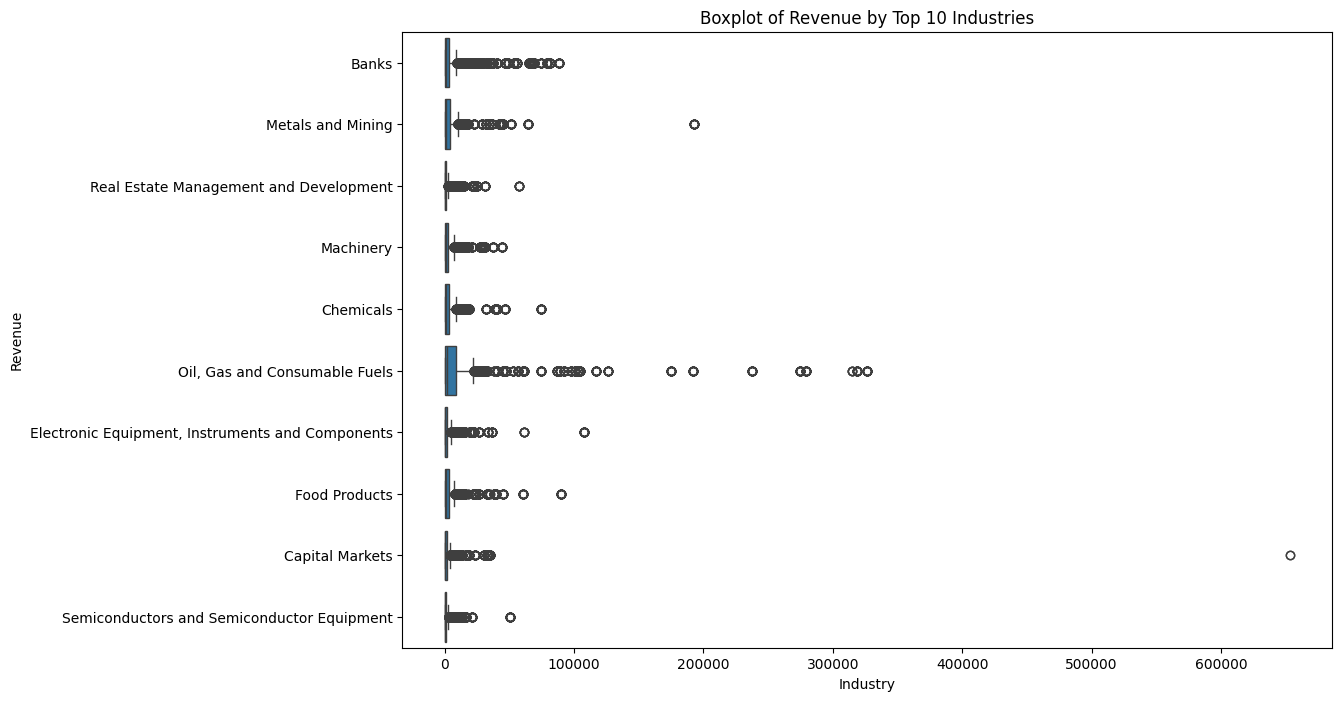

In [ ]:
#Revenue Boxplot by top 10 industries

top_industries = merged_final['simpleindustry'].value_counts().nlargest(10).index

df_top_industries = merged_final[merged_final['simpleindustry'].isin(top_industries)][['simpleindustry', 'revenue']]

grouped_df = df_top_industries.groupby('simpleindustry').mean().reset_index()

plt.figure(figsize=(12, 8))

sns.boxplot(y='simpleindustry', x='revenue', data=df_top_industries, order=top_industries)
plt.title('Boxplot of Revenue by Top 10 Industries')
plt.xlabel('Industry')
plt.ylabel('Revenue')
plt.show()


## Industry wise Revenue subplots

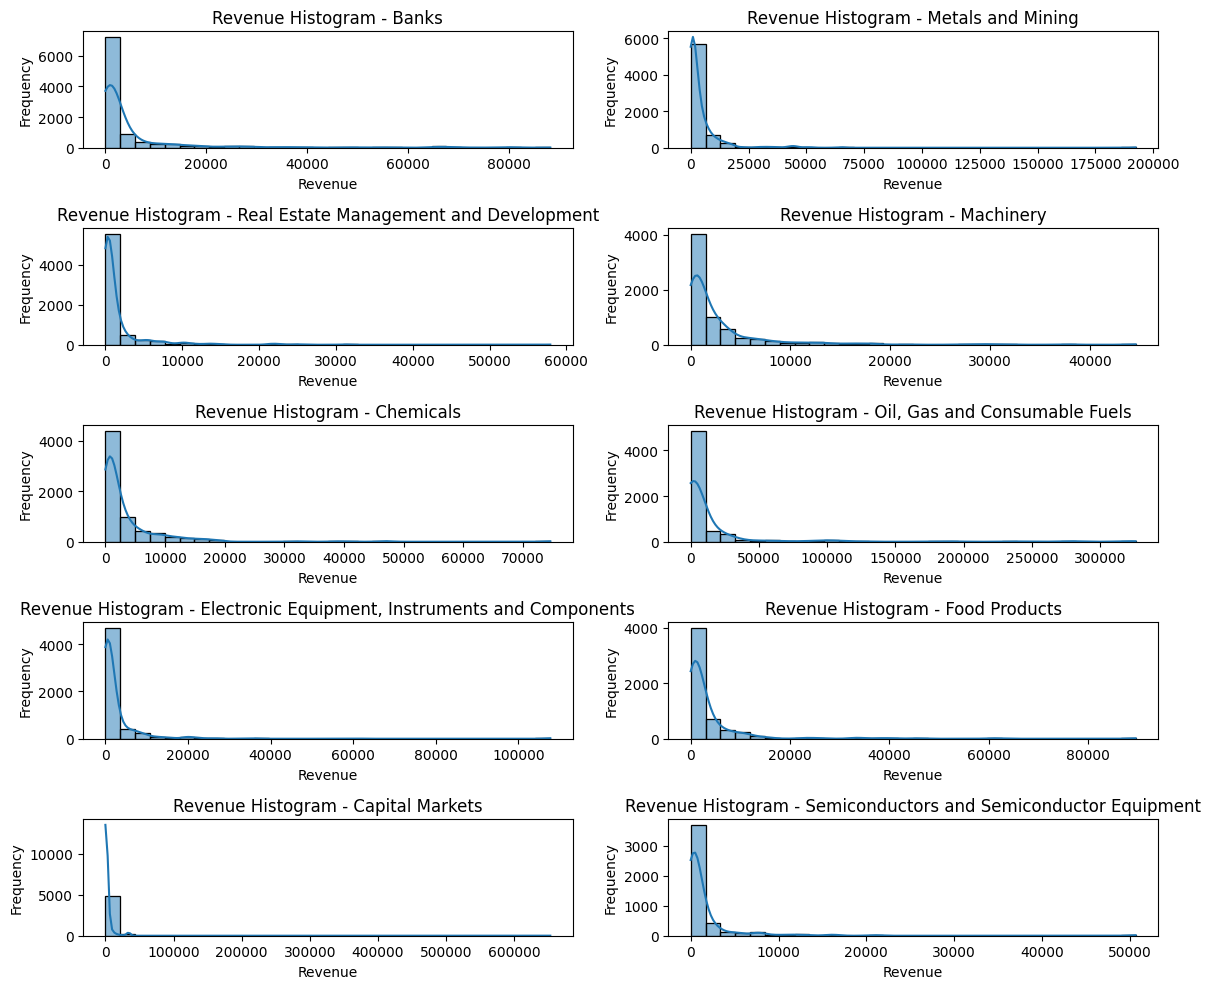

In [ ]:
# plotting the revenue by top 10 industry individually to see their spread
plt.figure(figsize=(12, 10))
for i, industry in enumerate(top_industries, start=1):
    plt.subplot(5, 2, i)
    sns.histplot(df_top_industries[df_top_industries['simpleindustry'] == industry]['revenue'], bins=30, kde=True)
    plt.title(f'Revenue Histogram - {industry}')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Industry wise ROA subplots

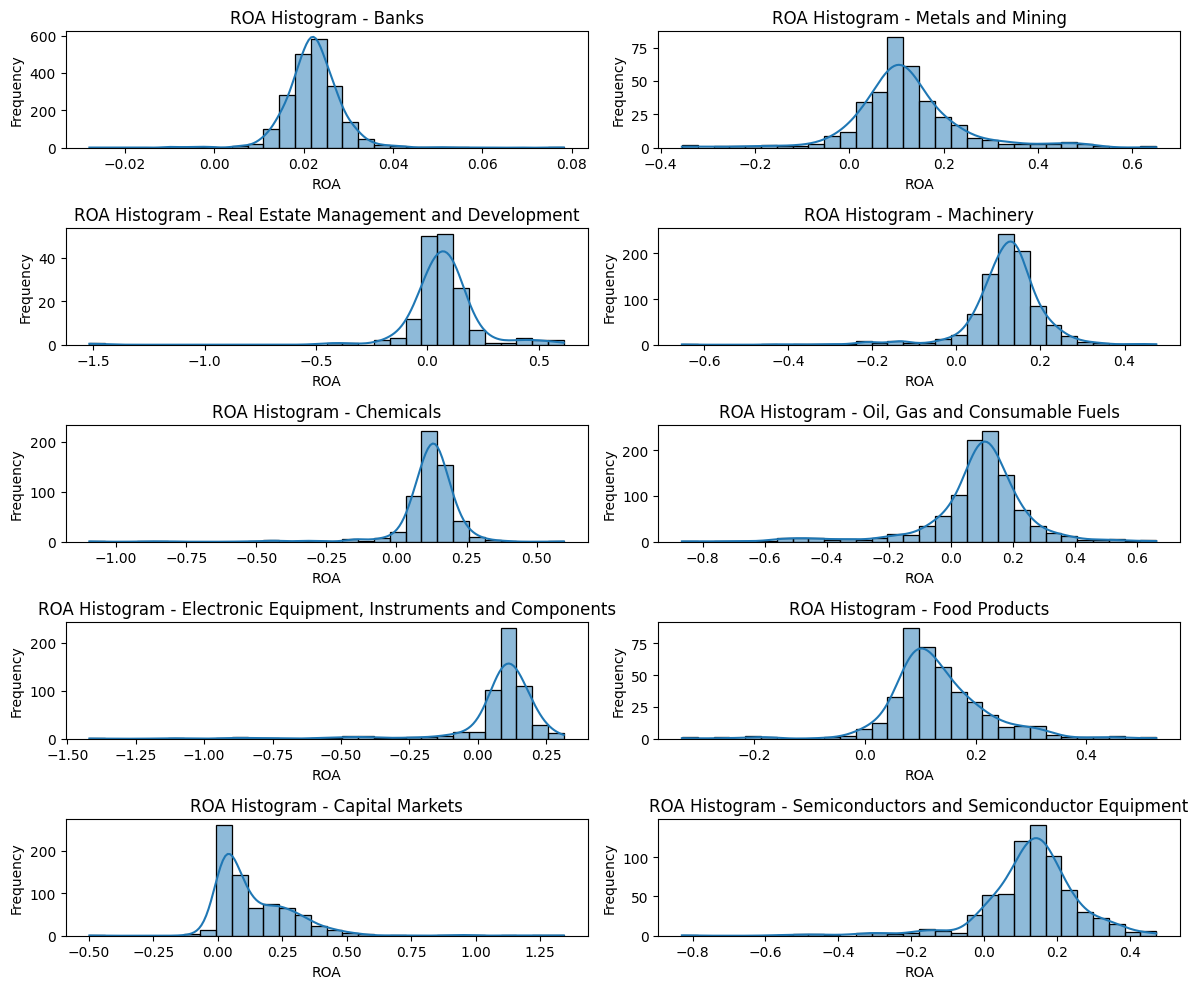

In [ ]:
# plotting the roa by top 10 industry individually to see their spread
df_top_indus_ROA = merged_final[merged_final['simpleindustry'].isin(top_industries)][['simpleindustry', 'roa']]

plt.figure(figsize=(12, 10))
for i, industry in enumerate(top_industries, start=1):
    plt.subplot(5, 2, i)
    sns.histplot(df_top_indus_ROA[df_top_indus_ROA['simpleindustry'] == industry]['roa'], bins=30, kde=True)
    plt.title(f'ROA Histogram - {industry}')
    plt.xlabel('ROA')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Top 10 countries with the highest total impact ratio

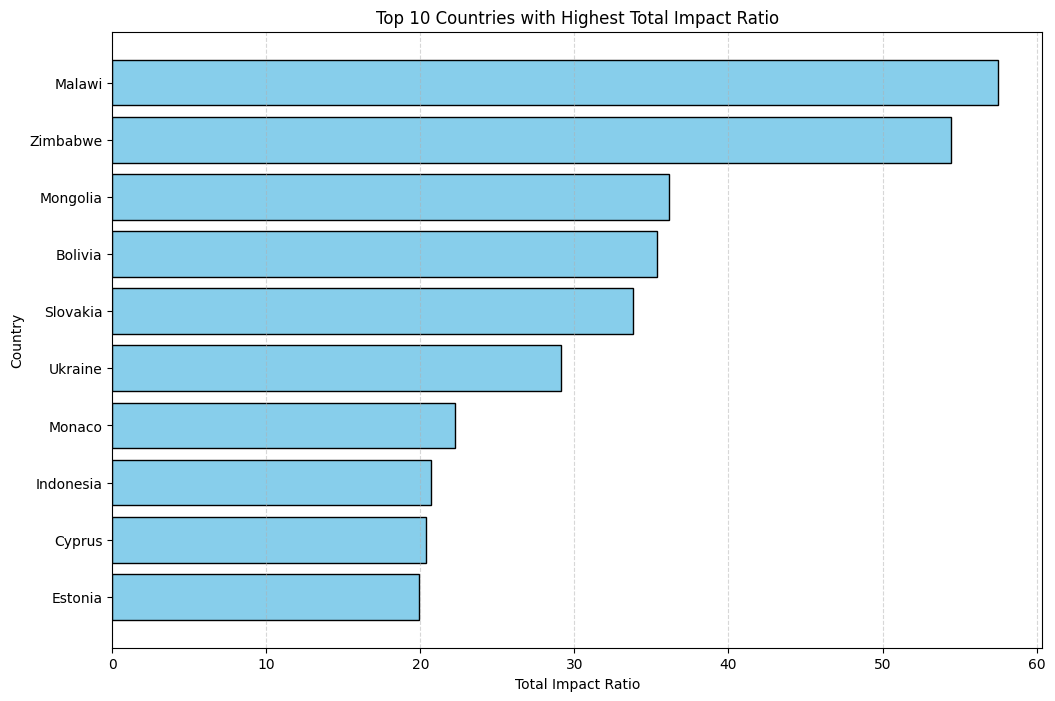

In [ ]:
# plotting the total impact ratio by the top 10 countries; Malawi has the highest
total_impact_by_country = merged_final.groupby('country')['total_impact_ratio'].mean().reset_index()

top_10_countries = total_impact_by_country.nlargest(10, 'total_impact_ratio')

plt.figure(figsize=(12, 8))
plt.barh(top_10_countries['country'], top_10_countries['total_impact_ratio'], color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with Highest Total Impact Ratio')
plt.xlabel('Total Impact Ratio')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


The countries with the highest total impact ratios highlight significant environmental challenges within their respective regions. Malawi leads with the highest ratio (57.51), indicating substantial environmental impacts from economic activities like agriculture. Zimbabwe follows closely (54.47), reflecting significant concerns related to mining and industry. Mongolia (36.11), Bolivia (35.33), and Slovakia (33.77) also show notable environmental impacts from mining, agriculture, and industrial activities. These findings emphasize the importance of implementing sustainable practices and environmental policies to address these challenges and promote environmental conservation in these countries.

## Top 10 industries with the highest total impact ratio

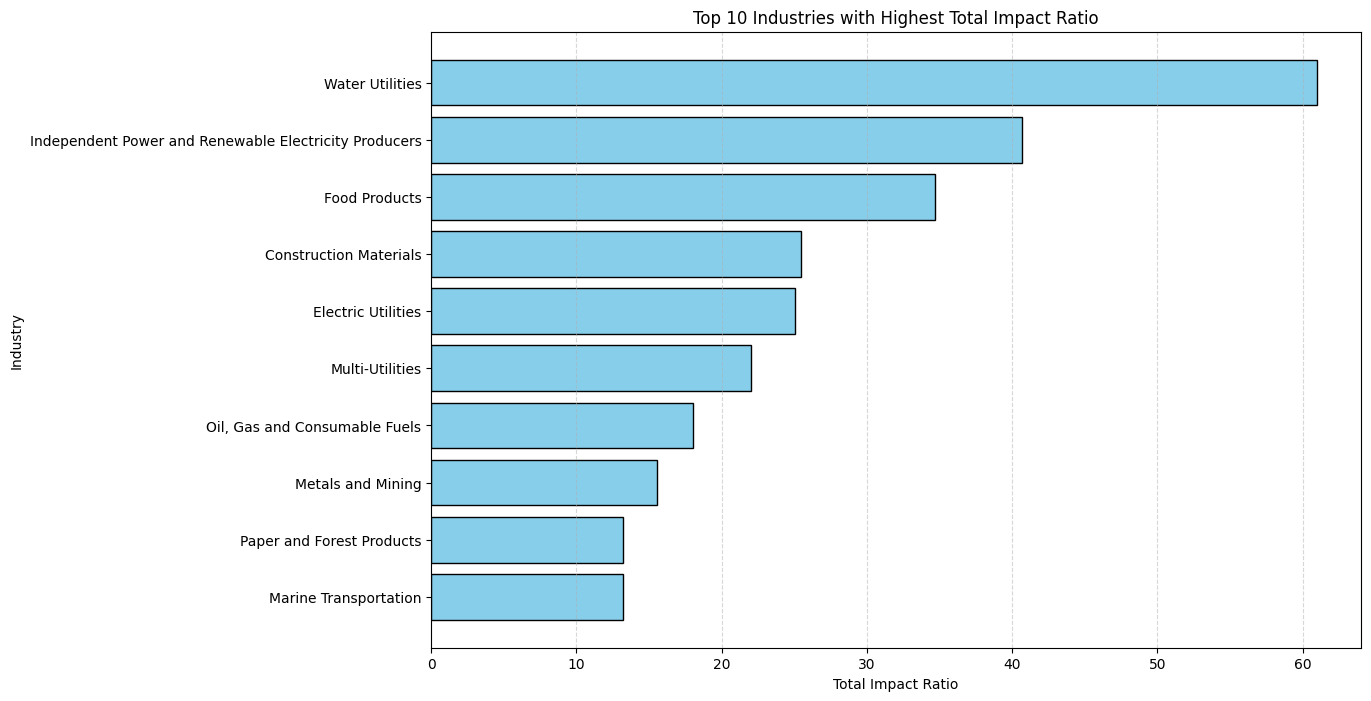

In [ ]:
# plotting the total impact ratio by the top 10 industry
total_impact_by_industry = merged_final.groupby('simpleindustry')['total_impact_ratio'].mean().reset_index()

top_10_industries = total_impact_by_industry.nlargest(10, 'total_impact_ratio')

plt.figure(figsize=(12, 8))
plt.barh(top_10_industries['simpleindustry'], top_10_industries['total_impact_ratio'], color='skyblue', edgecolor='black')
plt.title('Top 10 Industries with Highest Total Impact Ratio')
plt.xlabel('Total Impact Ratio')
plt.ylabel('Industry')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


The industries with the highest total impact ratios indicate significant environmental footprints within specific sectors. Water utilities lead with the highest ratio (60.98), reflecting substantial impacts related to water management. Independent power and renewable electricity production follow closely (40.66), highlighting environmental concerns in energy generation. The food products industry ranks third (34.70), underscoring sustainability challenges in agriculture and food processing. Construction materials and electric utilities also show notable impacts (25.49 and 25.03, respectively) related to resource extraction and energy production. These findings emphasize the importance of implementing sustainable practices to address industry-specific environmental challenges and reduce ecological footprints.

# Regressions

In running the regression, we choose to control for factors that might help explain the financial ratios, such as industry, year, and revenue.

We set our significance level for the coefficients to less than 0.05.

## Regressions on ROA

In [ ]:
#total impact ratio
roa_model1 = sm.OLS.from_formula('roa ~ total_impact_ratio', data = reg_all_out).fit()
roa_model2 = sm.OLS.from_formula('roa ~ total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
roa_model3 = sm.OLS.from_formula('roa ~ total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
roa_model4 = sm.OLS.from_formula('roa ~ total_impact_ratio + revenue', data=reg_all_out).fit()
roa_model5 = sm.OLS.from_formula('roa ~ total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([roa_model1, roa_model2, roa_model3, roa_model4, roa_model5])
results

In [ ]:
# ghg_total_impact_ratio
roa_model1 = sm.OLS.from_formula('roa ~ ghg_total_impact_ratio', data=reg_all_out).fit()
roa_model2 = sm.OLS.from_formula('roa ~ ghg_total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
roa_model3 = sm.OLS.from_formula('roa ~ ghg_total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
roa_model4 = sm.OLS.from_formula('roa ~ ghg_total_impact_ratio + revenue', data=reg_all_out).fit()
roa_model5 = sm.OLS.from_formula('roa ~ ghg_total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([roa_model1, roa_model2, roa_model3, roa_model4, roa_model5])
results

In [ ]:
# water_impact_ratio
roa_model1 = sm.OLS.from_formula('roa ~ water_impact_ratio', data=reg_all_out).fit()
roa_model2 = sm.OLS.from_formula('roa ~ water_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
roa_model3 = sm.OLS.from_formula('roa ~ water_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
roa_model4 = sm.OLS.from_formula('roa ~ water_impact_ratio + revenue', data=reg_all_out).fit()
roa_model5 = sm.OLS.from_formula('roa ~ water_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([roa_model1, roa_model2, roa_model3, roa_model4, roa_model5])
results

In [ ]:
#airpollutants_impact_ratio
roa_model1 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio', data=reg_all_out).fit()
roa_model2 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
roa_model3 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
roa_model4 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + revenue', data=reg_all_out).fit()
roa_model5 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([roa_model1, roa_model2, roa_model3, roa_model4, roa_model5])
results

## Regressions on Asset Turnover

In [ ]:
#total impact ratio
at_turn_model1 = sm.OLS.from_formula('at_turn ~ total_impact_ratio', data=reg_all_out).fit()
at_turn_model2 = sm.OLS.from_formula('at_turn ~ total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
at_turn_model3 = sm.OLS.from_formula('at_turn ~ total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
at_turn_model4 = sm.OLS.from_formula('at_turn ~ total_impact_ratio + revenue', data=reg_all_out).fit()
at_turn_model5 = sm.OLS.from_formula('at_turn ~ total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([at_turn_model1, at_turn_model2, at_turn_model3, at_turn_model4, at_turn_model5])
results

In [ ]:
#ghg_total_impact_ratio
at_turn_model1 = sm.OLS.from_formula('at_turn ~ ghg_total_impact_ratio', data=reg_all_out).fit()
at_turn_model2 = sm.OLS.from_formula('at_turn ~ ghg_total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
at_turn_model3 = sm.OLS.from_formula('at_turn ~ ghg_total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
at_turn_model4 = sm.OLS.from_formula('at_turn ~ ghg_total_impact_ratio + revenue', data=reg_all_out).fit()
at_turn_model5 = sm.OLS.from_formula('at_turn ~ ghg_total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([at_turn_model1, at_turn_model2, at_turn_model3, at_turn_model4, at_turn_model5])
results

In [ ]:
#water_impact_ratio
at_turn_model1 = sm.OLS.from_formula('at_turn ~ water_impact_ratio', data=reg_all_out).fit()
at_turn_model2 = sm.OLS.from_formula('at_turn ~ water_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
at_turn_model3 = sm.OLS.from_formula('at_turn ~ water_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
at_turn_model4 = sm.OLS.from_formula('at_turn ~ water_impact_ratio + revenue', data=reg_all_out).fit()
at_turn_model5 = sm.OLS.from_formula('at_turn ~ water_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([at_turn_model1, at_turn_model2, at_turn_model3, at_turn_model4, at_turn_model5])
results

In [ ]:
#airpollutants_impact_ratio
at_turn_model1 = sm.OLS.from_formula('at_turn ~ airpollutants_impact_ratio', data=reg_all_out).fit()
at_turn_model2 = sm.OLS.from_formula('at_turn ~ airpollutants_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
at_turn_model3 = sm.OLS.from_formula('at_turn ~ airpollutants_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
at_turn_model4 = sm.OLS.from_formula('at_turn ~ airpollutants_impact_ratio + revenue', data=reg_all_out).fit()
at_turn_model5 = sm.OLS.from_formula('at_turn ~ airpollutants_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([at_turn_model1, at_turn_model2, at_turn_model3, at_turn_model4, at_turn_model5])
results

## Regressions on Cash Conversions

In [ ]:
#total impact ratio
model1 = sm.OLS.from_formula('cash_conversion ~ total_impact_ratio', data=reg_all_out).fit()
model2 = sm.OLS.from_formula('cash_conversion ~ total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
model3 = sm.OLS.from_formula('cash_conversion ~ total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
model4 = sm.OLS.from_formula('cash_conversion ~ total_impact_ratio + revenue', data=reg_all_out).fit()
model5 = sm.OLS.from_formula('cash_conversion ~ total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([model1, model2, model3, model4, model5])
results

In [ ]:
# ghg_total_impact_ratio
model1 = sm.OLS.from_formula('cash_conversion ~ ghg_total_impact_ratio', data=reg_all_out).fit()
model2 = sm.OLS.from_formula('cash_conversion ~ ghg_total_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
model3 = sm.OLS.from_formula('cash_conversion ~ ghg_total_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
model4 = sm.OLS.from_formula('cash_conversion ~ ghg_total_impact_ratio + revenue', data=reg_all_out).fit()
model5 = sm.OLS.from_formula('cash_conversion ~ ghg_total_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([model1, model2, model3, model4, model5])
results

In [ ]:
# water_impact_ratio
model1 = sm.OLS.from_formula('cash_conversion ~ water_impact_ratio', data=reg_all_out).fit()
model2 = sm.OLS.from_formula('cash_conversion ~ water_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
model3 = sm.OLS.from_formula('cash_conversion ~ water_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
model4 = sm.OLS.from_formula('cash_conversion ~ water_impact_ratio + revenue', data=reg_all_out).fit()
model5 = sm.OLS.from_formula('cash_conversion ~ water_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([model1, model2, model3, model4, model5])
results

In [ ]:
#airpollutants_impact_ratio
model1 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio', data=reg_all_out).fit()
model2 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(simpleindustry)', data=reg_all_out).fit()
model3 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(fiscalyear)', data=reg_all_out).fit()
model4 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + revenue', data=reg_all_out).fit()
model5 = sm.OLS.from_formula('cash_conversion ~ airpollutants_impact_ratio + C(simpleindustry) + C(fiscalyear) + revenue', data=reg_all_out).fit()

results = Stargazer([model1, model2, model3, model4, model5])
results

# Analysis

The regression analyses on the three models show the highest R-squared value when all variables are controlled for. However, since controlling solely for the industry yields a similar R-squared value, we have decided to proceed with this simpler model.
When controlling for industry, we can see how some of the environmental coefficients lose significance. This is due to the industry variable capturing some of the variance previously attributed to environmental factors, indicating that these factors may be closely tied to specific industries rather than having a broad, independent effect.


**Return on asset:** When controlling for industry we do not find any significant effect of the enviromental variables on the ROA as our coefficient's p-values are above the set level of 0.05

**Asset turnover:** When controlling for industry we find that:
- The total impact ratio has an incremental effect of -0.001 on the A.T.
- The GHG total impact ratio has an incremental effect of -0.009 on the A.T.
- No significance was found for the water impact ratio
- No significance was found for the air pollutants impact ratio

**Cash Conversion Rate:** When controlling for industry we do not find any significant effect of the enviromental variables on the CCR.



# Conclusion


Asset turnover emerged as the most significant financial metric among others, such as cash conversion and return on assets, based on our regression analysis results. In selecting our regression model for the project, we opted for simplicity, choosing a model with only the simple industry variable over one including revenue, simple industry, and fiscal year. Although the adjusted R^2 value marginally favored the latter model, our decision was driven by the desire for a straightforward approach. Our analysis also revealed a lack of strong correlation between environmental metrics (such as GHG emissions, water usage, air pollutants, and total impact ratio) and financial performance metrics, likely due to the estimation nature of the environmental impact values provided by Trucost. While our analysis offers insights into potential relationships between environmental and financial performance, it's important to recognize that these estimates may not fully capture the complexities of a company's environmental footprint and its financial implications.

# Tableau Dashboards

[Link to Tableau Dashboard](https://public.tableau.com/shared/Y5DSND4D8?:display_count=n&:origin=viz_share_link)


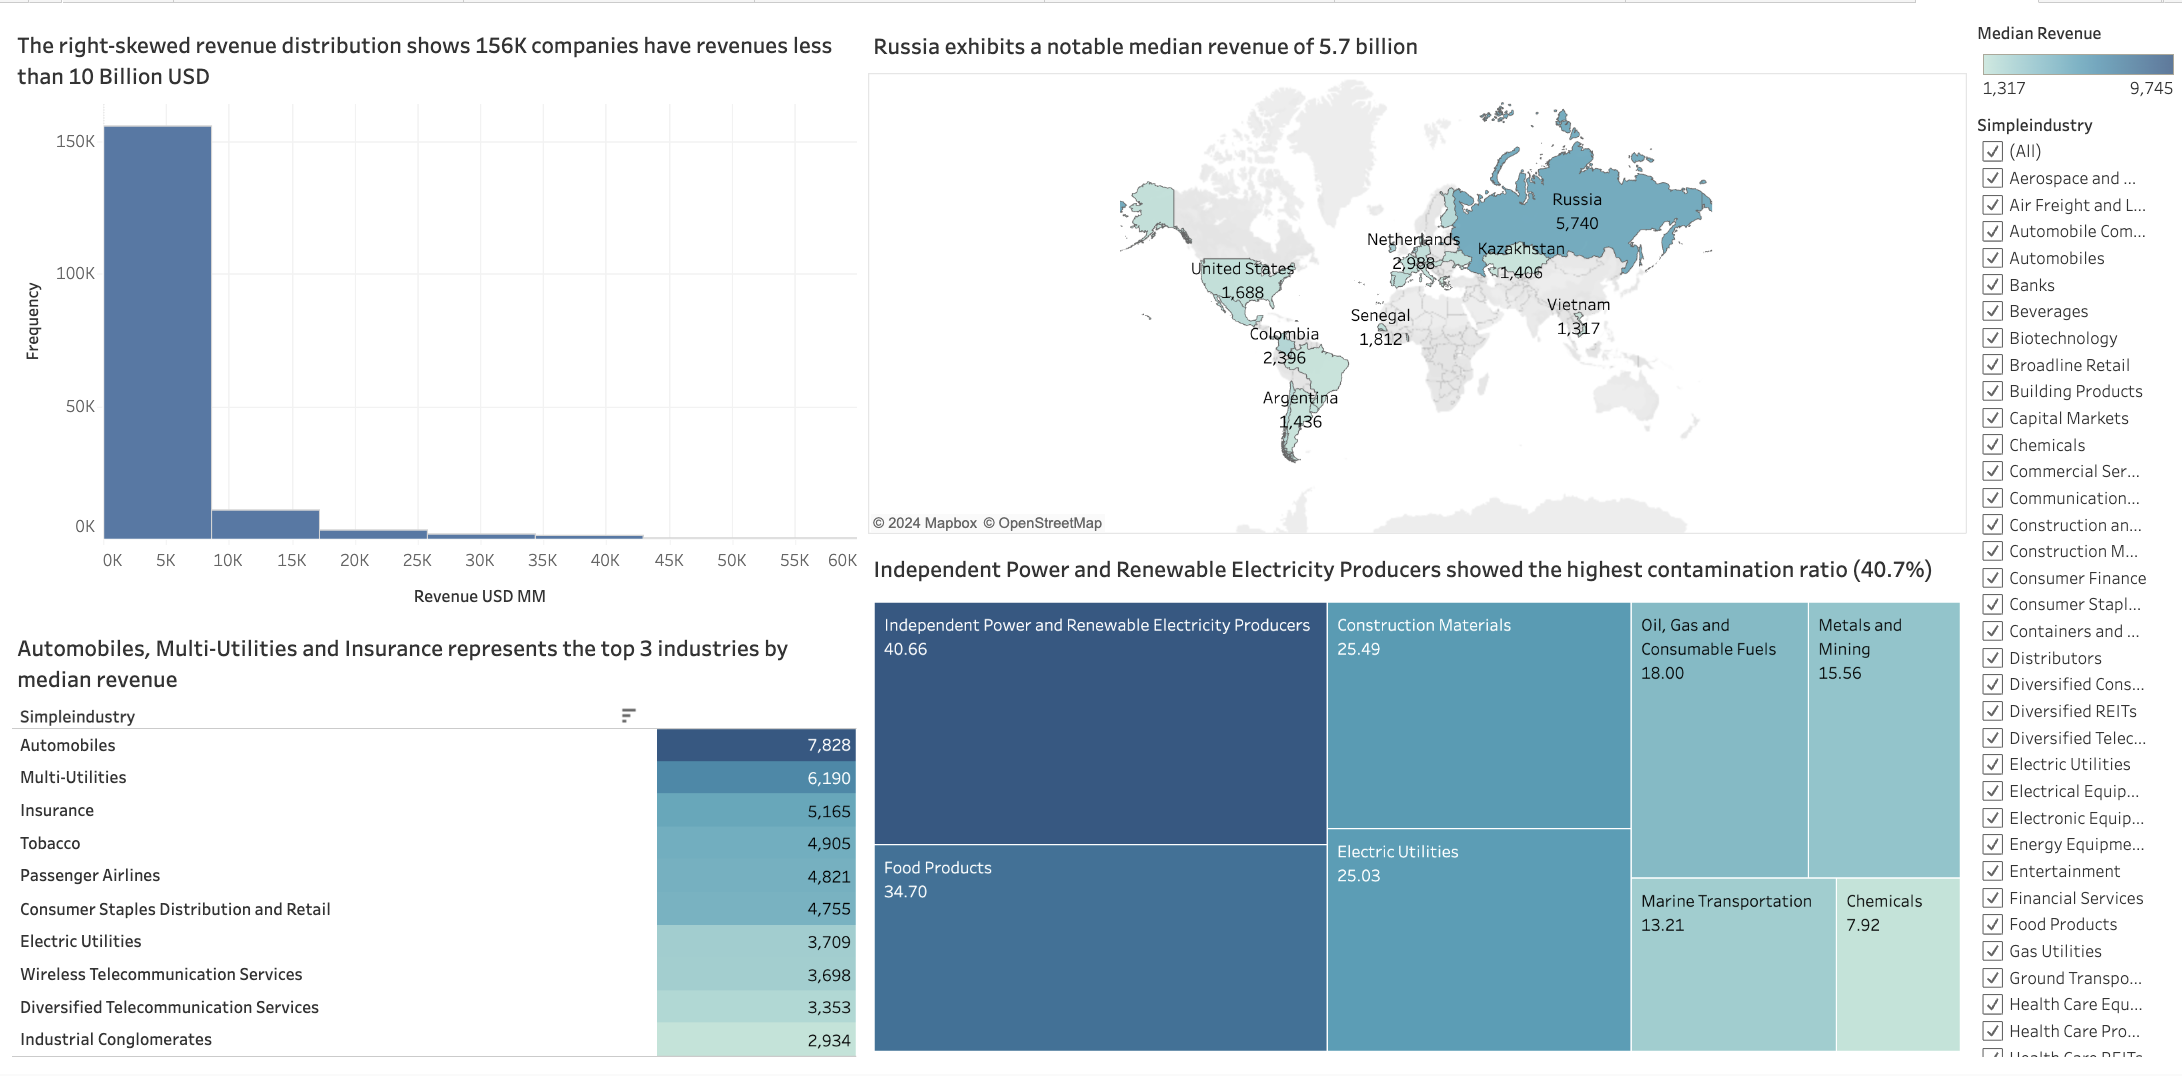

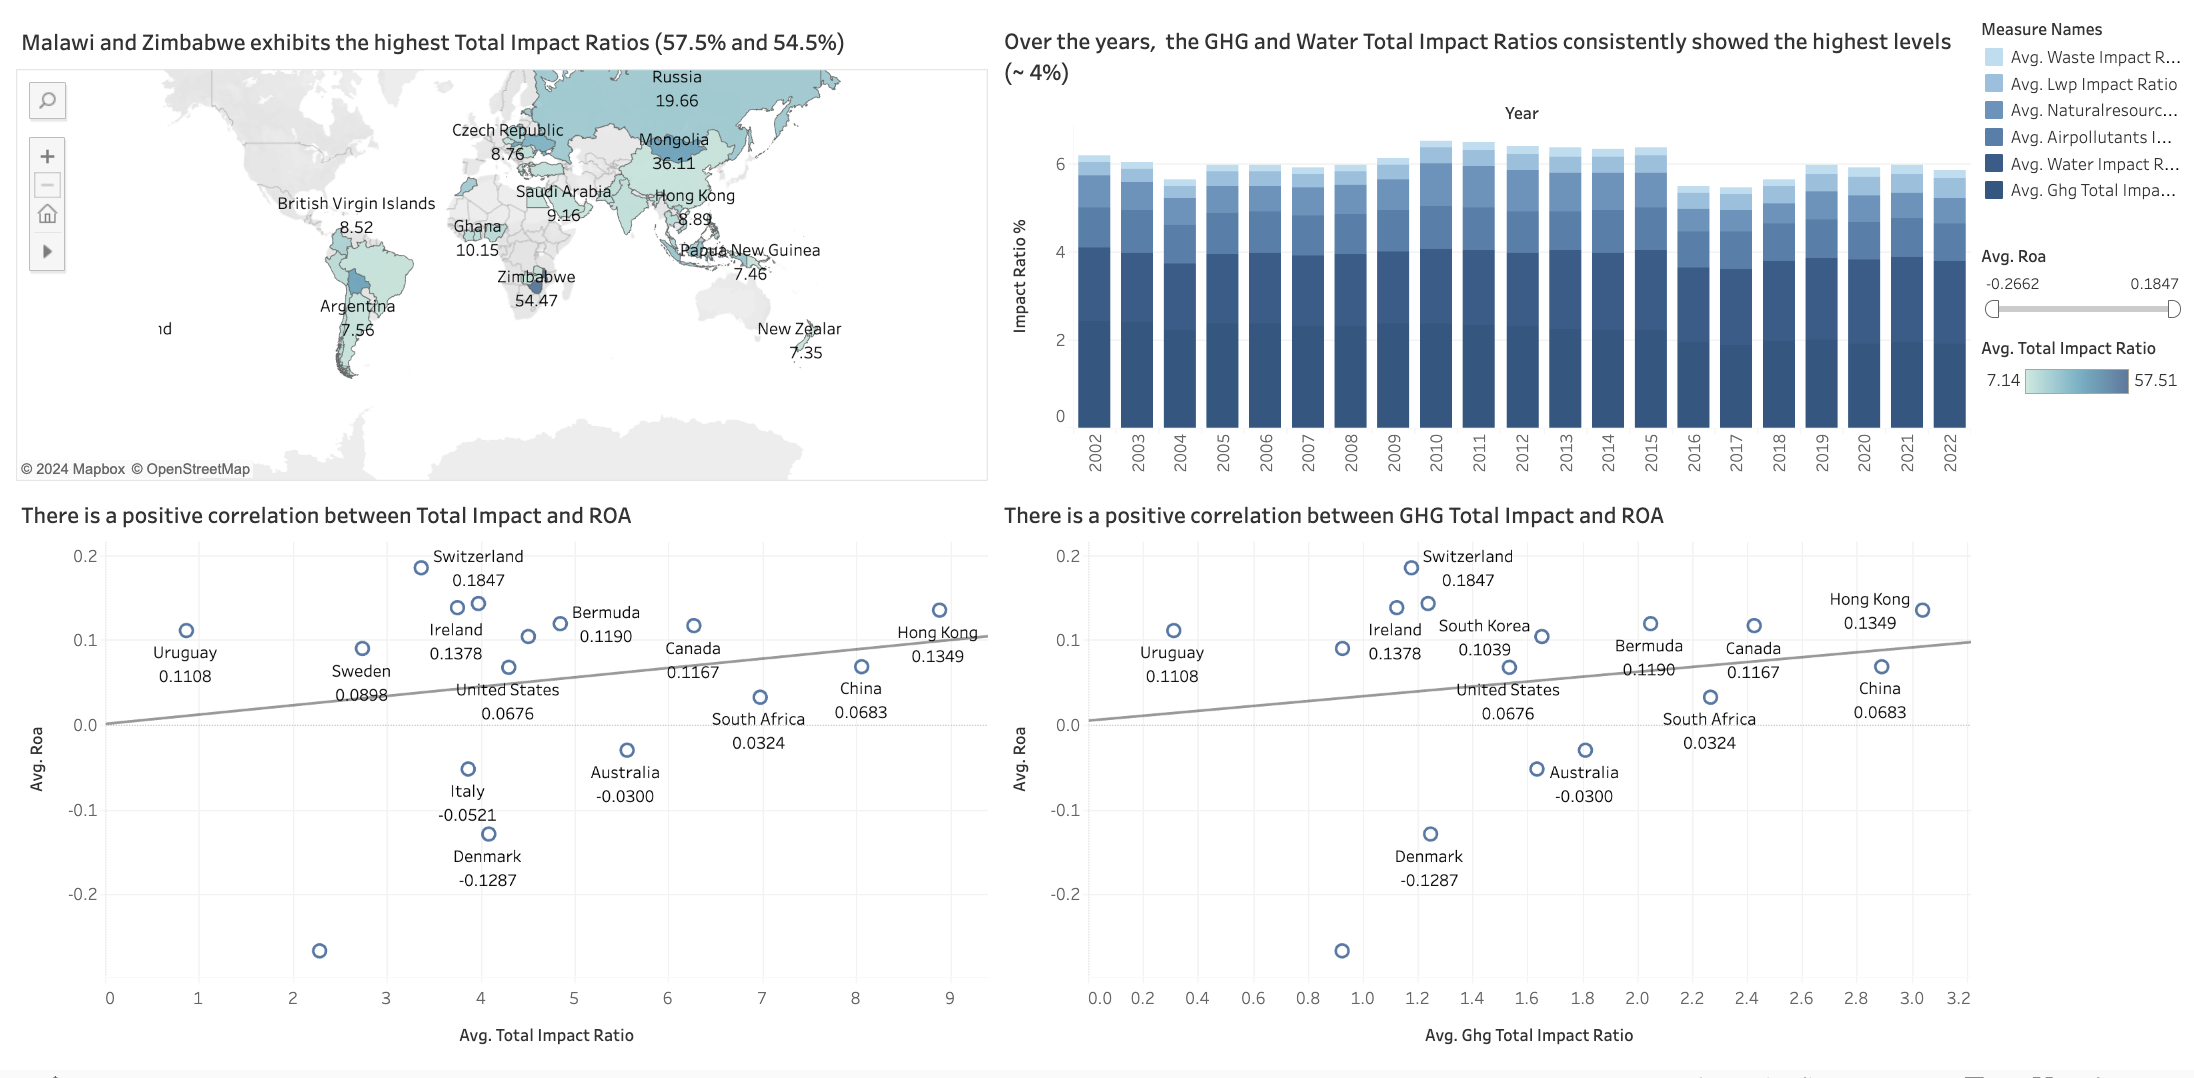